## Data

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
iris = datasets.load_iris()
X,y = iris.data, iris.target

In [3]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 42)

In [4]:
X_train.shape

(120, 4)

In [6]:
X_train[0]

array([4.6, 3.6, 1. , 0.2])

In [7]:
y_train.shape

(120,)

In [8]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

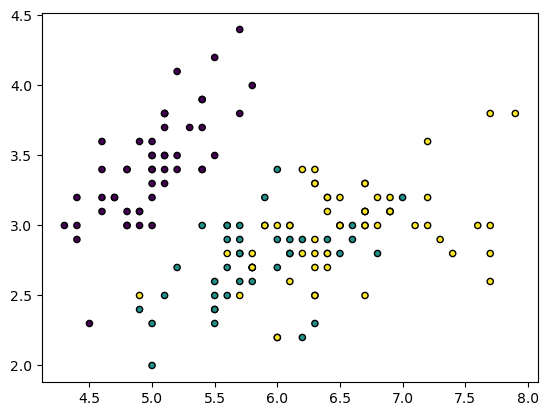

In [11]:
plt.scatter(X[:,0],X[:,1], c= y, edgecolor = 'k' , s=20)
plt.show()

## Model

In [29]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k=3):
       self.k = k
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def predict(self,X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
        
    def _predict(self,x):
        # Calculating Distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Getting k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # majority vote for most common label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    

In [30]:
clf = KNN(k=3)
clf.fit(X_train,y_train) 
predictions = clf.predict(X_test)
predictions


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
acc =  np.sum(predictions == y_test) /  len(y_test)
acc


1.0